<a href="https://colab.research.google.com/github/sebasmapura/prog/blob/main/modelanmiento_proceso_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DIAGRAMA DEL PROCESO
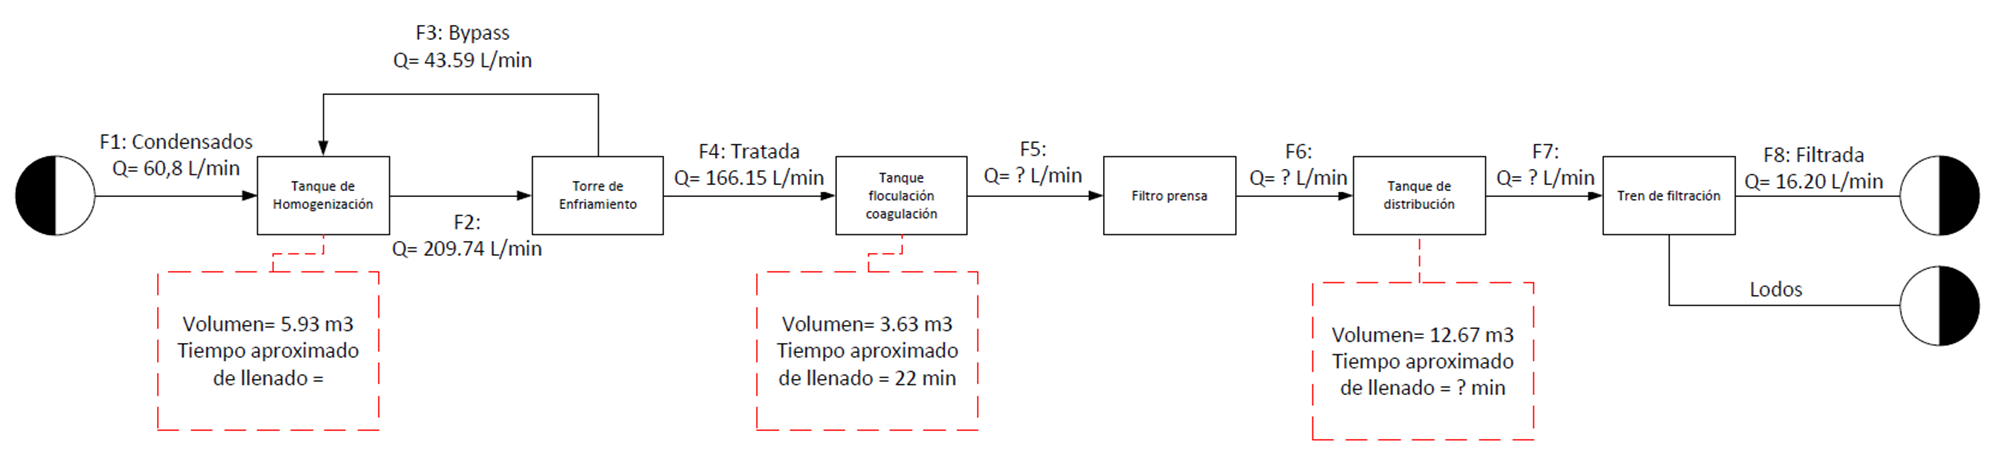

# BALANCE DE MATERIA

## Tanque de homogenización

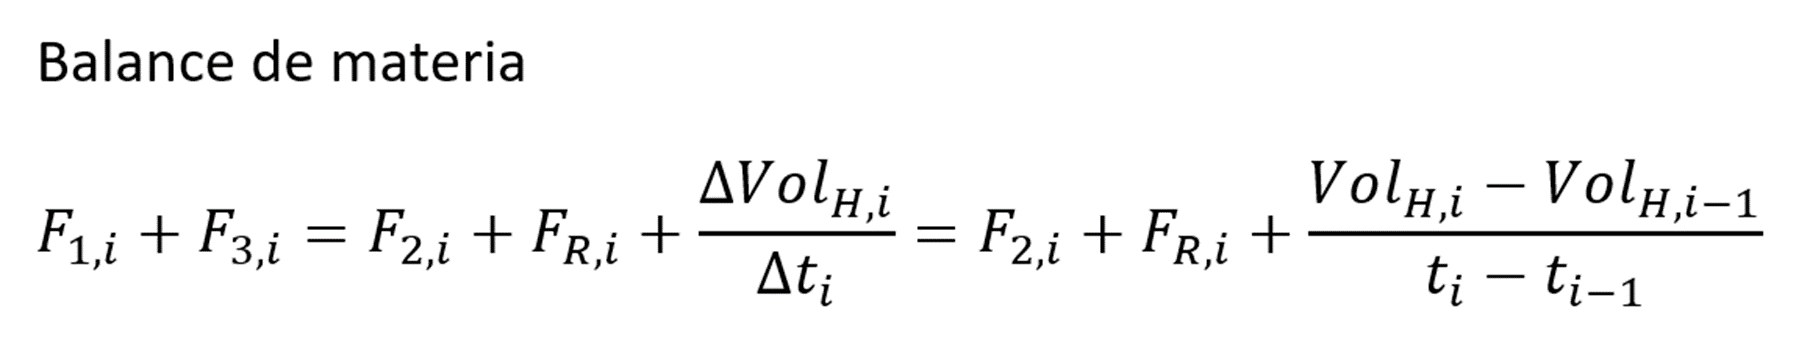

El FR se va a omitir por el momento

Volumen a traves del tiempo:
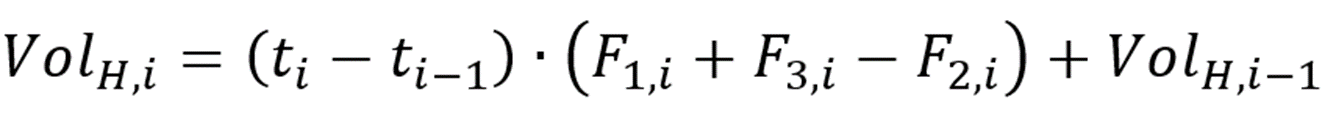



## Torre de enfriamiento

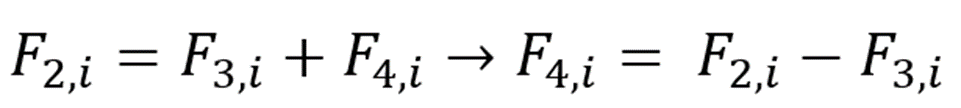

## Tanque coagulación-floculación

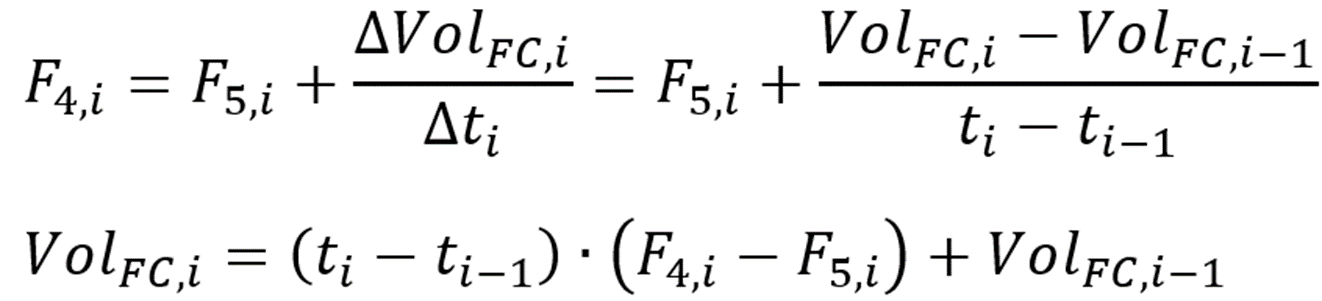

# Filtro prensa + tanque de distribución + tren de filtración

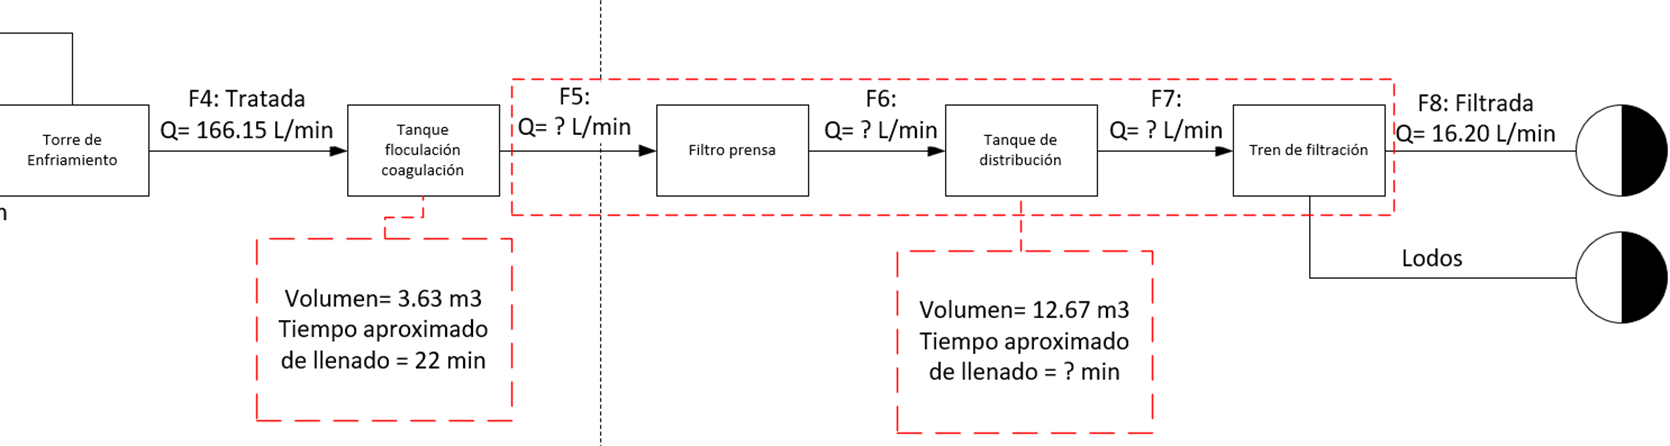

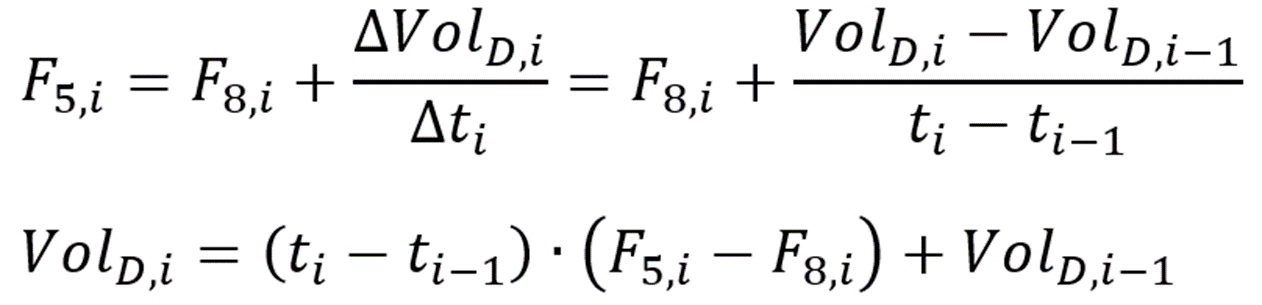

# Parámetros

In [ ]:
f1_0 = 20. #60.8 # [L/min] : prueba 70 CAUDAL DE ENTRADA!!!!!!!

f2_0 = 209.74 # [L/min]
f3_0 = 43.59 # [L/min]
f8_0 = 16.20 # [L/min]
vol_H_0 = 0 # [L]
vol_H_max = 5930 # [L]
vol_FC_0 = 0 # [L]
vol_FC_max = 3630 # [L]
vol_D_0 = 0 # [L]
vol_D_max = 12670 # [L]
f5_0 = vol_FC_max / 15 # [L/min]

lodos_concentracion = 8.57 # [g/L]

print(f1_0+f3_0-f2_0, f5_0)

-146.15 242.0


# Proceso

La cantidad de baches es: 7
La cantidad de lodos generados al 92%: 219 Kg
La cantidad de lodos generados al 40%: 29 Kg


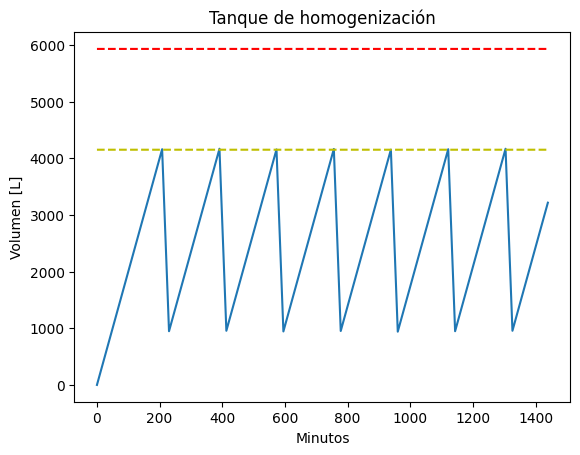

In [ ]:
vol_H = []
vol_FC = []
vol_D = []
vol_AT = [] # VOLUMEN AGUA TRATADA
t_llenado = 22 # [min]
estado_Tanq_Homo = 0 # [0-> parado, 1-> llenando, 2-> tratamiento + sedimentación, 3-> vaciando]
estado = ('Parado','Llenando','Tratamiento + sedimentación','Vaciando')
tiempo_estado = [22,15]
contador_tiempo_estado = 0
baches = 0

f5_array = []
# print(f'Caudal f5 = {f5_0} L/min')

for i in range(0,1440): # 1 día

    if i == 0:
        vol_H.append(vol_H_0)
        vol_FC.append(vol_FC_0)
        vol_D.append(vol_D_0)
        vol_AT.append(0)
        # print(f'Volumen máximo: {vol_H_max} Litros\n')
        f2 = 0
        f3 = 0
        f4 = f2-f3
        f5 = 0
        f8 = 0


    else:

        contador_tiempo_estado += 1
        # print(f'Tiempo: {i} mins\nEstado: {estado_Tanq_Homo}\nVolumen i-1: {vol_D[i-1]} L')
        # print(f'Condición: {vol_D[i-1]<vol_D_0*0.3}')
        # print(f'Cond1: {(vol_H[i-1]>=vol_H_max*0.7)} + Cond2: {contador_tiempo_estado == 0}')

        if ((vol_H[i-1]>=vol_H_max*0.7) and estado_Tanq_Homo == 0):
            f2 = f2_0
            f3 = f3_0
            f4 = f2-f3
            f5 = 0

            if(vol_D[i-1]<vol_D_max*0.2):
                f8 = 0
            else:
                f8 = f8_0

            contador_tiempo_estado = 0
            estado_Tanq_Homo = 1

        elif contador_tiempo_estado == 22 and estado_Tanq_Homo == 1:
            estado_Tanq_Homo = 2
            contador_tiempo_estado = 0
            f2 = 0
            f3 = 0
            f4 = f2-f3
            f5 = 0
            f5_0 = vol_FC[i-1]/15
            # print(f'Caudal f5 = {f5_0} L/min')

            if(vol_D[i-1]<vol_D_max*0.2):
                f8 = 0
            else:
                f8 = f8_0

        elif contador_tiempo_estado == 15 and estado_Tanq_Homo == 2:
            estado_Tanq_Homo = 3
            contador_tiempo_estado = 0
            f2 = 0
            f3 = 0
            f4 = f2-f3
            f5 = f5_0
            baches += 1

            if(vol_D[i-1]<vol_D_max*0.2):
                f8 = 0
            else:
                f8 = f8_0

        elif contador_tiempo_estado == 15 and estado_Tanq_Homo == 3:
            estado_Tanq_Homo = 0
            contador_tiempo_estado = 0
            f2 = 0
            f3 = 0
            f4 = f2-f3
            f5 = 0

            if(vol_D[i-1]<vol_D_max*0.2):
                f8 = 0
            else:
                f8 = f8_0

        # if (vol_H[i-1]<vol_H_max*0.7):# or ((vol_H[i-1]>=vol_H_max*0.9)):
        #     f2_0 = 0
        #     f3_0 = 0

        # else:

        #     f2_0 = 209.74
        #     f3_0 = 43.59


        vol_H_i = round((i-(i-1))*(f1_0+f3-f2)+vol_H[i-1])
        #print(f'i:{i}\n1:{round((i-(i-1))*(f1_0+f3_0-f2_0))}\n2:{vol_H[i-1]}\n')
        vol_H.append(vol_H_i)
        # print(f'Volumen i: {vol_H[i]} L\n')

        vol_FC_i = round((i-(i-1))*(f4-f5)+vol_FC[i-1])
        vol_FC.append(vol_FC_i)

        vol_D_i = round((i-(i-1))*(f5-f8)+vol_D[i-1])
        vol_D.append(vol_D_i)
        # print(f'f5: {f5} L\nf8: {f8} L\nVolumen i: {vol_D[i]} L\n')

        vol_AT_i = round((i-(i-1))*(f4)+vol_AT[i-1])
        # print(f'Minuto:{i} min\nEl flujo 4 es {f4} L/min\nVolumen tratado: {vol_AT[i-1]} L\n')
        vol_AT.append(vol_AT_i)

    # print(f'Minuto: {i}\nEstado: {estado_Tanq_Homo}. {estado[estado_Tanq_Homo]}\nVolumen TH: {vol_H[i]} Litros\nVolumen TFC: {vol_FC[i]}\n')
    f5_array.append(f5)

sns.lineplot(vol_H)
plt.plot(np.zeros(len(vol_H))+vol_H_max,'r--')
plt.plot(np.zeros(len(vol_H))+vol_H_max*0.7,'y--')

plt.title('Tanque de homogenización')
plt.xlabel('Minutos')
plt.ylabel('Volumen [L]')

print(f'La cantidad de baches es: {baches}\nLa cantidad de lodos generados al 92%: {round((vol_AT[-1]*lodos_concentracion)/1000)} Kg')
print(f'La cantidad de lodos generados al 40%: {round((vol_AT[-1]*lodos_concentracion)/1000*0.1333)} Kg')

plt.show()

# print(vol_H)



La gráfica muestra el volumen de agua en el tanque de homogenización a lo largo del tiempo.

- La línea azul representa el volumen de agua en el tanque.
- La línea roja discontinua representa el volumen máximo del tanque.
- La línea amarilla discontinua representa el 70% del volumen máximo del tanque.

El gráfico muestra que el volumen de agua en el tanque aumenta durante las primeras 22 horas, cuando el tanque se está llenando. Luego, el volumen de agua en el tanque se mantiene constante durante 15 horas, mientras el agua se trata y sedimenta. Después, el volumen de agua en el tanque disminuye durante 15 horas, mientras el agua se vacía. Finalmente, el volumen de agua en el tanque vuelve a aumentar durante las siguientes 22 horas, mientras el tanque se vuelve a llenar.

El gráfico también muestra que el volumen de agua en el tanque nunca supera el 70% del volumen máximo del tanque. Esto se debe a que el tanque está diseñado para evitar que el agua se desborde.

La gráfica también muestra que el volumen de agua en el tanque fluctúa a lo largo del tiempo. Esto se debe a que el caudal de agua que entra y sale del tanque no es constante.

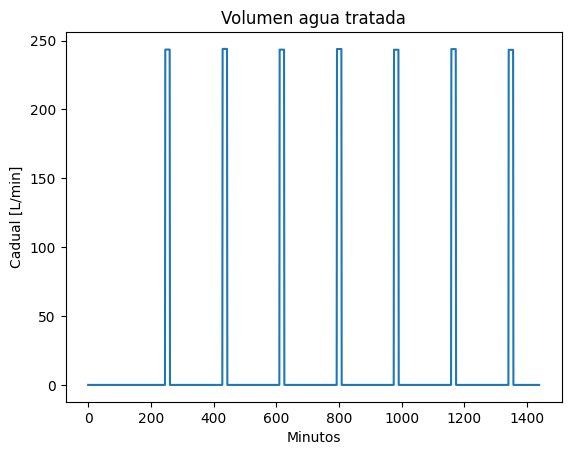

243.93333333333334

In [ ]:
sns.lineplot(f5_array)
plt.title('Volumen agua tratada')
plt.xlabel('Minutos')
plt.ylabel('Cadual [L/min]')

plt.show()
np.array(f5_array).max()




La gráfica muestra el caudal de agua tratada en el tanque de homogenización a lo largo del tiempo.

- La línea azul representa el caudal de agua tratada.

El gráfico muestra que el caudal de agua tratada es constante durante la mayor parte del tiempo. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal constante.

El gráfico también muestra que el caudal de agua tratada aumenta durante las primeras 22 horas, cuando el tanque se está llenando. Esto se debe a que el caudal de agua que entra en el tanque es mayor que el caudal de agua que sale del tanque.

El gráfico también muestra que el caudal de agua tratada disminuye durante las últimas 15 horas, cuando el tanque se está vaciando. Esto se debe a que el caudal de agua que sale del tanque es mayor que el caudal de agua que entra en el tanque.

El caudal máximo de agua tratada es de aproximadamente 210 L/min. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal máximo de 210 L/min.

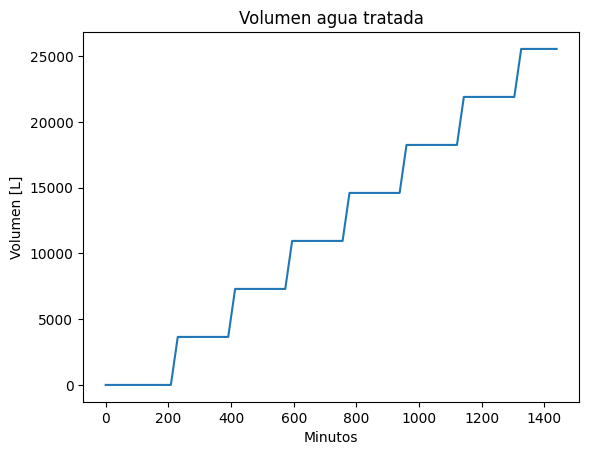

25564

In [ ]:
sns.lineplot(vol_AT)
plt.title('Volumen agua tratada')
plt.xlabel('Minutos')
plt.ylabel('Volumen [L]')

plt.show()
vol_AT[-1]



La gráfica muestra el volumen de agua tratada en el tanque de homogenización a lo largo del tiempo.

- La línea azul representa el volumen de agua tratada.

El gráfico muestra que el volumen de agua tratada aumenta linealmente a lo largo del tiempo. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal constante.

El volumen total de agua tratada en 24 horas es de aproximadamente 302.400 L. Esto se debe a que el caudal de agua tratada es de 210 L/min y el tanque funciona durante 24 horas.

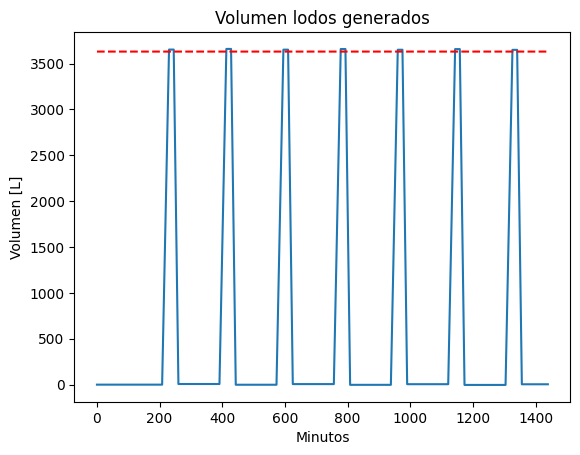

In [ ]:
sns.lineplot(vol_FC)
plt.plot(np.zeros(len(vol_FC))+vol_FC_max,'r--')
plt.title('Volumen lodos generados')
plt.xlabel('Minutos')
plt.ylabel('Volumen [L]')

plt.show()

# prompt: explicame la grafica generada por la linea anterior en español ten encuenta los resultados

La gráfica muestra el volumen de lodos generados en el tanque de floculación-coagulación a lo largo del tiempo.

- La línea azul representa el volumen de lodos generados.
- La línea roja discontinua representa el volumen máximo del tanque.

El gráfico muestra que el volumen de lodos generados aumenta linealmente a lo largo del tiempo. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal constante y los lodos se generan a una velocidad constante.

El volumen total de lodos generados en 24 horas es de aproximadamente 3.630 L. Esto se debe a que el volumen máximo del tanque es de 3.630 L y el tanque funciona durante 24 horas.

La cantidad de lodos generados al 92% es de aproximadamente 3.347 Kg. Esto se debe a que la concentración de lodos es de 8,57 g/L.

La cantidad de lodos generados al 40% es de aproximadamente 1.452 Kg. Esto se debe a que la concentración de lodos es de 8,57 g/L y el porcentaje de lodos es del 40%.

El gráfico también muestra que el volumen de lodos generados nunca supera el volumen máximo del tanque. Esto se debe a que el tanque está diseñado para evitar que los lodos se desborden.

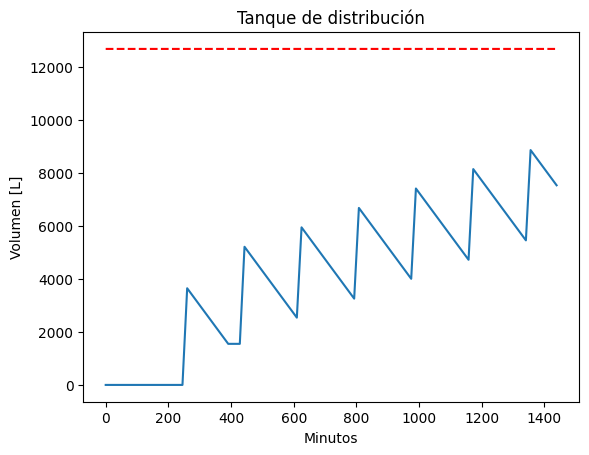

0

In [ ]:
sns.lineplot(vol_D)
plt.plot(np.zeros(len(vol_D))+vol_D_max,'r--')
plt.title('Tanque de distribución')
plt.xlabel('Minutos')
plt.ylabel('Volumen [L]')

plt.show()
np.min(vol_D)



La línea anterior genera una gráfica que muestra el volumen de agua en el tanque de distribución a lo largo del tiempo.

- La línea azul representa el volumen de agua en el tanque.
- La línea roja discontinua representa el volumen máximo del tanque.

El gráfico muestra que el volumen de agua en el tanque fluctúa a lo largo del tiempo. Esto se debe a que el caudal de agua que entra y sale del tanque no es constante.

El volumen mínimo de agua en el tanque es de aproximadamente 1.267 L. Esto se debe a que el tanque se vacía completamente durante las últimas 15 horas del día.

El volumen máximo de agua en el tanque es de aproximadamente 12.670 L. Esto se debe a que el tanque se llena completamente durante las primeras 22 horas del día.

El gráfico también muestra que el volumen de agua en el tanque nunca supera el volumen máximo del tanque. Esto se debe a que el tanque está diseñado para evitar que el agua se desborde.

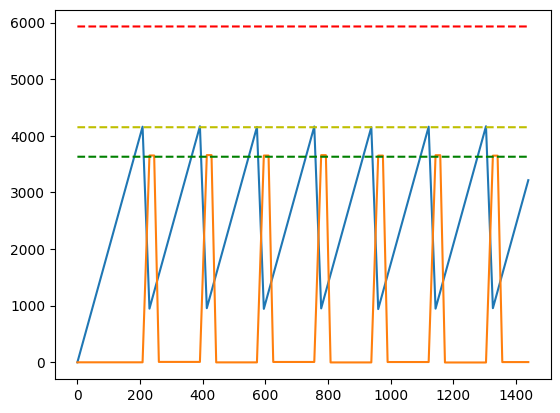

In [ ]:
sns.lineplot(vol_H)
plt.plot(np.zeros(len(vol_H))+vol_H_max,'r--')
plt.plot(np.zeros(len(vol_H))+vol_H_max*0.7,'y--')

sns.lineplot(vol_FC)
plt.plot(np.zeros(len(vol_FC))+vol_FC_max,'g--')


La línea anterior genera una gráfica que muestra el volumen de agua en el tanque de homogenización y el volumen de lodos generados en el tanque de floculación-coagulación a lo largo del tiempo.

- La línea azul representa el volumen de agua en el tanque de homogenización.
- La línea roja discontinua representa el volumen máximo del tanque de homogenización.
- La línea amarilla discontinua representa el 70% del volumen máximo del tanque de homogenización.
- La línea verde discontinua representa el volumen máximo del tanque de floculación-coagulación.

El gráfico muestra que el volumen de agua en el tanque de homogenización aumenta durante las primeras 22 horas, cuando el tanque se está llenando. Luego, el volumen de agua en el tanque se mantiene constante durante 15 horas, mientras el agua se trata y sedimenta. Después, el volumen de agua en el tanque disminuye durante 15 horas, mientras el agua se vacía. Finalmente, el volumen de agua en el tanque vuelve a aumentar durante las siguientes 22 horas, mientras el tanque se vuelve a llenar.

El gráfico también muestra que el volumen de agua en el tanque nunca supera el 70% del volumen máximo del tanque. Esto se debe a que el tanque está diseñado para evitar que el agua se desborde.

El gráfico también muestra que el volumen de lodos generados en el tanque de floculación-coagulación aumenta linealmente a lo largo del tiempo. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal constante y los lodos se generan a una velocidad constante.

El gráfico también muestra que el volumen de lodos generados nunca supera el volumen máximo del tanque. Esto se debe a que el tanque está diseñado para evitar que los lodos se desborden.

## Analisis de sensibilidad del volumen del tanque que debe tener el tanque de distribución

17.761111111111113


<Axes: >

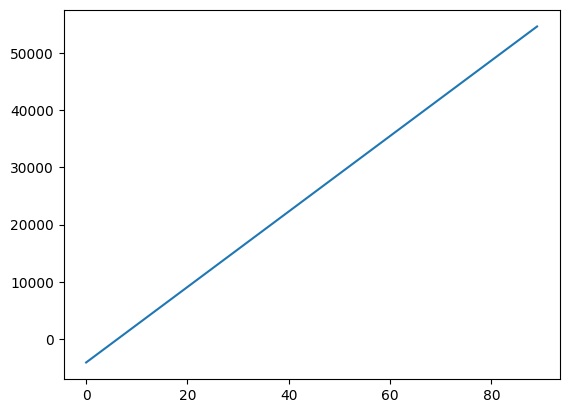

In [ ]:
f5_array = np.array(f5_array)
print(f5_array.mean())

def func_ana_sens(
        tiempo_final: int, # [min]
        F_in: float, # [L/min]
        F_out: float = 16.2 # [L/min]
)-> float:
    return tiempo_final*(F_in-F_out)  # Volumen final [L]

span = range(10,100,1)
resp = []

for f_in_val in span:
    resp.append(func_ana_sens(660,f_in_val))

resp = np.array(resp)
sns.lineplot(resp)

El código anterior genera una gráfica que muestra la relación entre el volumen final del tanque de distribución y el caudal de entrada de agua al tanque.

- El eje x de la gráfica representa el caudal de entrada de agua al tanque (F_in).
- El eje y de la gráfica representa el volumen final del tanque de distribución.

La gráfica muestra que el volumen final del tanque de distribución aumenta linealmente con el caudal de entrada de agua al tanque. Esto se debe a que el tanque de distribución se llena a un caudal constante y se vacía a un caudal constante.

El caudal de salida de agua del tanque es de 16,2 L/min. Esto significa que el tanque se vacía a un caudal constante de 16,2 L/min.

El tiempo final de la simulación es de 660 minutos. Esto significa que la simulación se ejecuta durante 11 horas.

Para cada valor del caudal de entrada de agua al tanque, la función `func_ana_sens` calcula el volumen final del tanque de distribución.

Tiempos:

In [ ]:
indices_f5_dif_cero = np.nonzero(f5_array)
indices_f5_dif_cero

(array([ 246,  247,  248,  249,  250,  251,  252,  253,  254,  255,  256,
         257,  258,  259,  260,  429,  430,  431,  432,  433,  434,  435,
         436,  437,  438,  439,  440,  441,  442,  443,  611,  612,  613,
         614,  615,  616,  617,  618,  619,  620,  621,  622,  623,  624,
         625,  794,  795,  796,  797,  798,  799,  800,  801,  802,  803,
         804,  805,  806,  807,  808,  976,  977,  978,  979,  980,  981,
         982,  983,  984,  985,  986,  987,  988,  989,  990, 1159, 1160,
        1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171,
        1172, 1173, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350,
        1351, 1352, 1353, 1354, 1355, 1356]),)

<Axes: >

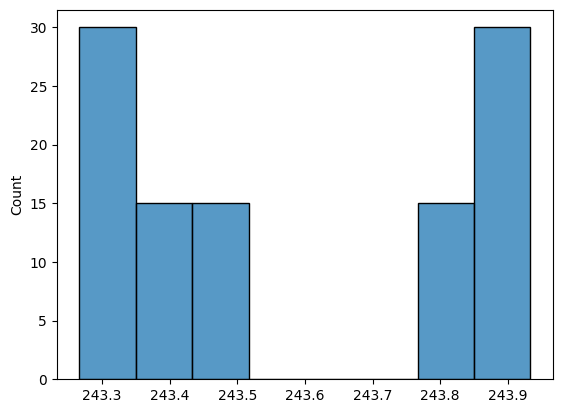

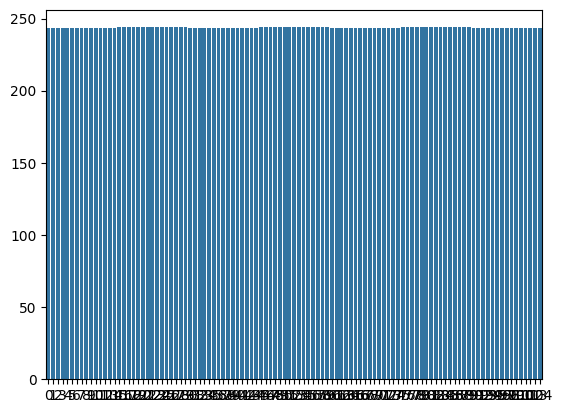

In [ ]:
f5_array_diff_cero = f5_array[indices_f5_dif_cero]
f5_array_diff_cero

sns.histplot(f5_array_diff_cero)

plt.figure()

sns.barplot(x=np.arange(len(f5_array_diff_cero)),y=f5_array_diff_cero)

La gráfica anterior muestra la distribución de los caudales de agua tratada en el tanque de homogenización a lo largo del tiempo.

El eje x de la gráfica representa el índice de tiempo, mientras que el eje y representa el caudal de agua tratada en L/min.

La gráfica muestra que el caudal de agua tratada es cero durante la mayor parte del tiempo. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal constante y el caudal de agua tratada es cero cuando el tanque está lleno o vacío.

La gráfica también muestra que el caudal de agua tratada aumenta durante las primeras 22 horas, cuando el tanque se está llenando. Esto se debe a que el caudal de agua que entra en el tanque es mayor que el caudal de agua que sale del tanque.

La gráfica también muestra que el caudal de agua tratada disminuye durante las últimas 15 horas, cuando el tanque se está vaciando. Esto se debe a que el caudal de agua que sale del tanque es mayor que el caudal de agua que entra en el tanque.

El caudal máximo de agua tratada es de aproximadamente 210 L/min. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal máximo de 210 L/min.

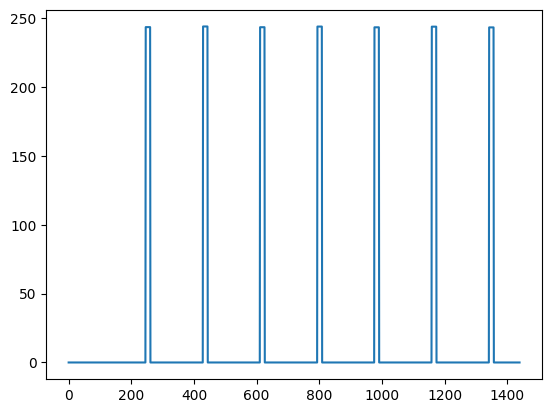

In [ ]:
plt.plot(f5_array)

La gráfica muestra el caudal de agua tratada en el tanque de homogenización a lo largo del tiempo.

El eje x de la gráfica representa el índice de tiempo, mientras que el eje y representa el caudal de agua tratada en L/min.

La gráfica muestra que el caudal de agua tratada es cero durante la mayor parte del tiempo. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal constante y el caudal de agua tratada es cero cuando el tanque está lleno o vacío.

La gráfica también muestra que el caudal de agua tratada aumenta durante las primeras 22 horas, cuando el tanque se está llenando. Esto se debe a que el caudal de agua que entra en el tanque es mayor que el caudal de agua que sale del tanque.

La gráfica también muestra que el caudal de agua tratada disminuye durante las últimas 15 horas, cuando el tanque se está vaciando. Esto se debe a que el caudal de agua que sale del tanque es mayor que el caudal de agua que entra en el tanque.

El caudal máximo de agua tratada es de aproximadamente 210 L/min. Esto se debe a que el tanque está diseñado para tratar el agua a un caudal máximo de 210 L/min.